In [8]:
#Oct 27 and 28 are weekends
import pandas as pd
#dfQuotes = pd.read_csv("/Users/rohitk/Documents/Sure Data/IBMandRHTQuotes.csv")
dfTrades = pd.read_csv("/Users/rohitk/Documents/Sure Data/IBMandRHTTrades.csv")
dfTrades

,DATE,TIME_M,SYM_ROOT,SYM_SUFFIX,SIZE,PRICE
0,20181022,4:03:28.995389000,IBM,NaN,200,129.73
1,20181022,4:26:26.485407000,IBM,NaN,12,129.50
2,20181022,5:49:33.252150000,IBM,NaN,2,129.50
3,20181022,6:49:35.433117000,IBM,NaN,30,129.45
4,20181022,6:50:51.986140000,IBM,NaN,10,129.72
...,...,...,...,...,...,...
1439145,20181102,18:05:15.571047000,RHT,NaN,60599,172.24
1439146,20181102,18:17:24.482159000,RHT,NaN,11,172.20
1439147,20181102,18:17:24.482241000,RHT,NaN,11,172.18
1439148,20181102,19:49:17.208228000,RHT,NaN,10,171.99


In [9]:
dfTrades = dfTrades.drop(columns = ['SYM_SUFFIX'])

In [10]:
dfTrades['Datetime'] = pd.to_datetime(dfTrades["DATE"].astype(str) + " " + dfTrades["TIME_M"].astype(str))

In [11]:
dfTrades = dfTrades.drop(columns=['DATE','TIME_M'])

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
dfTrades = dfTrades.set_index('Datetime')
dfTrades #has dateTime Index

,SYM_ROOT,SIZE,PRICE
Datetime,,,
2018-10-22 04:03:28.995389,IBM,200,129.73
2018-10-22 04:26:26.485407,IBM,12,129.50
2018-10-22 05:49:33.252150,IBM,2,129.50
2018-10-22 06:49:35.433117,IBM,30,129.45
2018-10-22 06:50:51.986140,IBM,10,129.72
...,...,...,...
2018-11-02 18:05:15.571047,RHT,60599,172.24
2018-11-02 18:17:24.482159,RHT,11,172.20
2018-11-02 18:17:24.482241,RHT,11,172.18


In [14]:
dfRHTTrades = dfTrades[dfTrades["SYM_ROOT"] == "RHT"]
dfIBMTrades = dfTrades[dfTrades["SYM_ROOT"] == "IBM"]

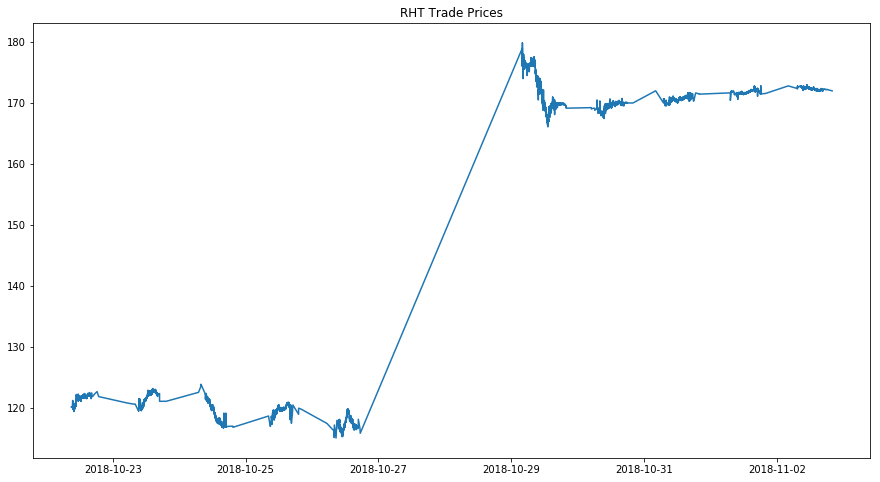

In [9]:
plt.figure(figsize=[15,8])
plt.title("RHT Trade Prices")
plt.plot(dfRHTTrades["PRICE"])

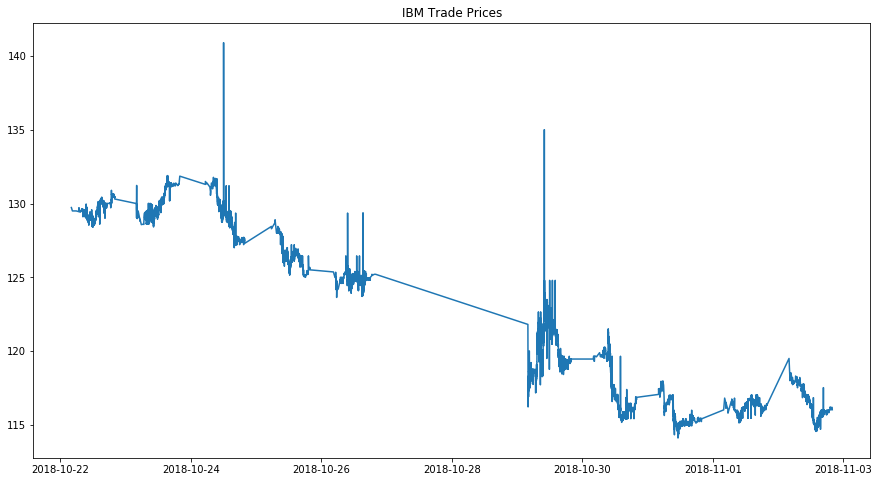

In [10]:
plt.figure(figsize=[15,8])
plt.title("IBM Trade Prices")
plt.plot(dfIBMTrades["PRICE"])

In [21]:
groupedOct29RHT = dfRHTTrades[dfRHTTrades.index.date.astype(str) == '2018-10-29']
groupedOct29IBM = dfIBMTrades[dfIBMTrades.index.date.astype(str) == '2018-10-29']

groupedOct26RHT = dfRHTTrades[dfRHTTrades.index.date.astype(str) == '2018-10-26']
groupedOct26IBM = dfIBMTrades[dfIBMTrades.index.date.astype(str) == '2018-10-26']

groupedOct30RHT = dfRHTTrades[dfRHTTrades.index.date.astype(str) == '2018-10-30']
groupedOct30IBM = dfIBMTrades[dfIBMTrades.index.date.astype(str) == '2018-10-30']

groupedOct25RHT = dfRHTTrades[dfRHTTrades.index.date.astype(str) == '2018-10-25']
groupedOct25IBM = dfIBMTrades[dfIBMTrades.index.date.astype(str) == '2018-10-25']

In [26]:
import numpy as np
RHTOct29Array = groupedOct29RHT.index.to_numpy()
IBMOct29Array = groupedOct29IBM.index.to_numpy()

RHTOct26Array = groupedOct26RHT.index.to_numpy()
IBMOct26Array = groupedOct26IBM.index.to_numpy()

RHTOct30Array = groupedOct30RHT.index.to_numpy()
IBMOct30Array = groupedOct30IBM.index.to_numpy()

RHTOct25Array = groupedOct25RHT.index.to_numpy()
IBMOct25Array = groupedOct25IBM.index.to_numpy()

print("RHT Oct 25: " + str(len(RHTOct25Array)))
print("RHT Oct 26: " + str(len(RHTOct26Array)))
print("RHT Oct 29: " + str(len(RHTOct29Array)))
print("RHT Oct 30: " + str(len(RHTOct30Array)))
print("IBM Oct 25: " + str(len(IBMOct25Array)))
print("IBM Oct 26: " + str(len(IBMOct26Array)))
print("IBM Oct 29: " + str(len(IBMOct29Array)))
print("IBM Oct 30: " + str(len(IBMOct30Array)))


print("total Trades Oct 25: " + str(len(RHTOct25Array) + len(IBMOct25Array)))
print("total Trades Oct 26: " + str(len(RHTOct26Array) + len(IBMOct26Array)))
print("total Trades Oct 29: " + str(len(RHTOct29Array) + len(IBMOct29Array)))
print("total Trades Oct 30: " + str(len(RHTOct30Array) + len(IBMOct30Array)))

RHT Oct 25: 16876
RHT Oct 26: 17268
RHT Oct 29: 206685
RHT Oct 30: 74631
IBM Oct 25: 85885
IBM Oct 26: 83283
IBM Oct 29: 152829
IBM Oct 30: 144534
total Trades Oct 25: 102761
total Trades Oct 26: 100551
total Trades Oct 29: 359514
total Trades Oct 30: 219165


In [15]:
#Key is time diff and value is number of trades
crossTradesOct29 = {}

for i in range(-1,0):
    totalCross = 0
    
    for time in RHTTimes:
        timeOffset = time + pd.DateOffset(microseconds=i)
        numCross = sum(groupedOct29IBM.index == timeOffset)
        totalCross += numCross
    
    crossTradesOct29[i] = totalCross

print(crossTradesOct29)

KeyboardInterrupt: 

In [ ]:
dfRHTQuotes = df[df['SYM_ROOT'] == 'RHT']
dfRHT['Datetime'] = pd.to_datetime(dfRHT["DATE"].astype(str) + " " + dfRHT["TIME_M"].astype(str))
dfRHT.drop(columns=['DATE','TIME_M'])
dfRHT = dfRHT.set_index('Datetime')